In [1]:
import pandas as pd

with open("profile5.data", "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.strip().startswith("zone"):
        header_line = i
        break

columns = lines[header_line].strip().split()
data_lines = lines[header_line + 1:]

from io import StringIO
df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)

df["convective"] = df["gradr"] > df["grada"]
convective_df = df[df["convective"]]

q_bottom_tams = convective_df["q"].min()
q_top_tams = convective_df["q"].max()

print(f"q_bottom_tams = {q_bottom_tams}")
print(f"q_top_tams = {q_top_tams}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_776\2966718900.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)


q_bottom_tams = 7.813138528655334e-08
q_top_tams = 0.9999999993205155


In [ ]:
import pandas as pd
from io import StringIO

with open("profile5.data", "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.strip().startswith("zone"):
        header_line = i
        break

columns = lines[header_line].strip().split()
data_lines = lines[header_line + 1:]

df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)

df["convective"] = df["gradr"] > df["grada"]
convective_df = df[df["convective"]]

filtered_q = convective_df[(convective_df["q"] > 1e-6) & (convective_df["q"] < 0.4)]["q"].sort_values()

q_bottom_tams = filtered_q.min()
q_top_tams = filtered_q.max()

print(f"\nq_bottom_tams = {q_bottom_tams}")
print(f"q_top_tams = {q_top_tams}")



q_bottom_tams = 1.250103823272462e-06
q_top_tams = 0.3910208968566109


C:\Users\ASUS\AppData\Local\Temp\ipykernel_776\3568806798.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2104\2418640051.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)


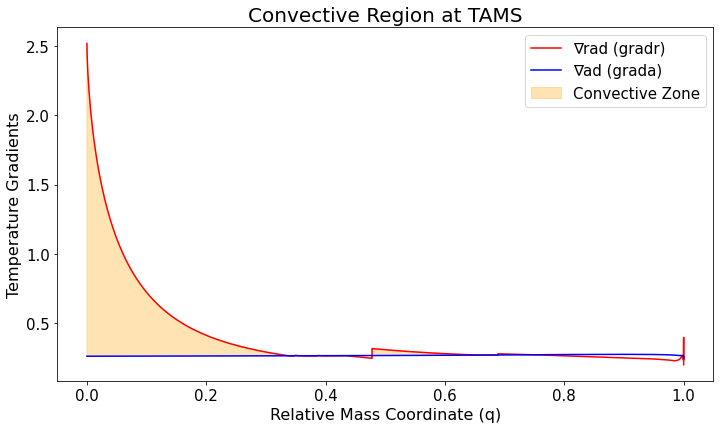

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

with open("profile5.data", "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.strip().startswith("zone"):
        header_line = i
        break

columns = lines[header_line].strip().split()
data_lines = lines[header_line + 1:]

df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)

df["convective"] = df["gradr"] > df["grada"]

q = df["q"].to_numpy()
gradr = df["gradr"].to_numpy()
grada = df["grada"].to_numpy()
convective_mask = df["convective"].to_numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(q, gradr, label="∇rad (gradr)", color="red")
plt.plot(q, grada, label="∇ad (grada)", color="blue")
plt.fill_between(q, gradr, grada, where=convective_mask, color="orange", alpha=0.3, label="Convective Zone")

plt.xlabel("Relative Mass Coordinate (q)", fontsize = 16)
plt.ylabel("Temperature Gradients", fontsize = 16)
plt.title("Convective Region at TAMS", fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(False)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)

plt.savefig("ex_2_q1.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2104\1747869316.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)


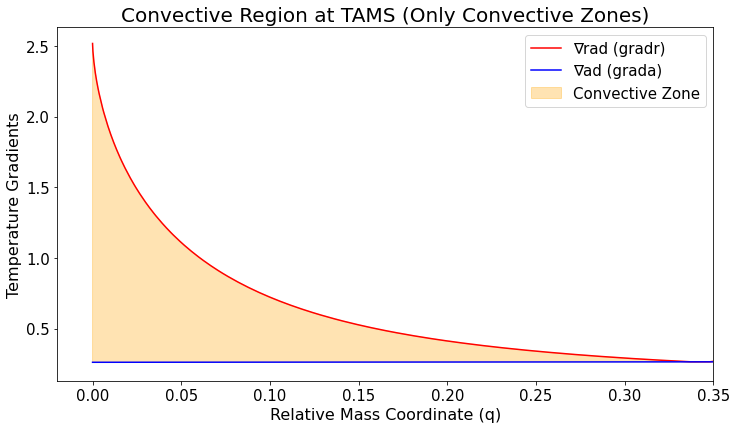

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

with open("profile5.data", "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.strip().startswith("zone"):
        header_line = i
        break

columns = lines[header_line].strip().split()
data_lines = lines[header_line + 1:]

df = pd.read_csv(StringIO("".join(data_lines)), delim_whitespace=True, names=columns)

df["convective"] = df["gradr"] > df["grada"]

convective_df = df[df["convective"]]
q = convective_df["q"].to_numpy()
gradr = convective_df["gradr"].to_numpy()
grada = convective_df["grada"].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(q, gradr, label="∇rad (gradr)", color="red")
plt.plot(q, grada, label="∇ad (grada)", color="blue")
plt.fill_between(q, gradr, grada, color="orange", alpha=0.3, label="Convective Zone")

plt.xlabel("Relative Mass Coordinate (q)", fontsize = 16)
plt.ylabel("Temperature Gradients", fontsize = 16)
plt.title("Convective Region at TAMS (Only Convective Zones)", fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(False)
plt.tight_layout()
plt.xlim(-0.02,0.35)
#plt.xlim(0.25,0.35)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("ex_2_q1_2.jpg", dpi = 1200)
plt.show()


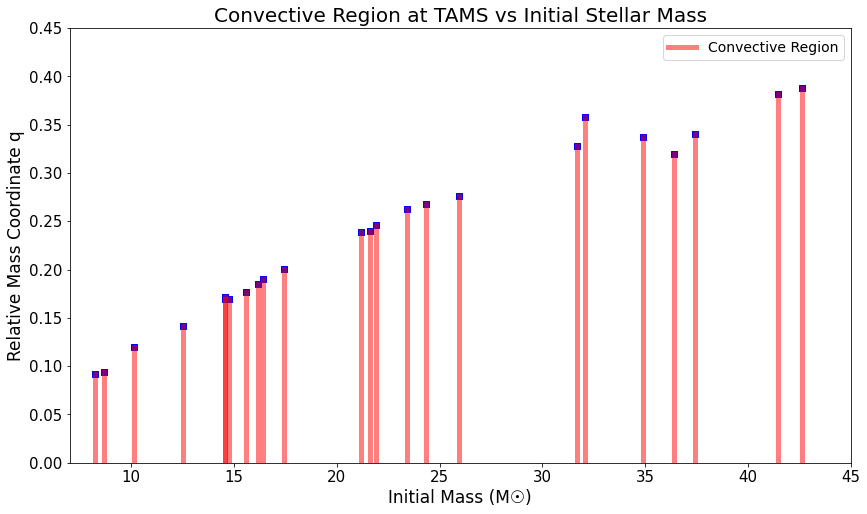

In [41]:
import matplotlib.pyplot as plt

# Masses and q ranges
masses = [32.057,
14.565,
31.667,
14.745,
36.387,
10.152,
25.937,
21.616,
17.451,
14.551,
34.885,
21.18,
37.405,
8.254,
12.498,
42.648,
21.918, 
23.394,
8.655,
41.456,
15.575,
16.433,
24.34,
16.144]
q_bottom = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0]
q_top = [0.358,
0.172,
0.328,
0.17,
0.32,
0.12,
0.276,
0.24,
0.201,
0.17,
0.337,
0.239,
0.34,
0.0915,
0.142,
0.388,
0.245884,
0.263,
0.094,
0.382,
0.177,
0.190,
0.268,
0.185]

plt.figure(figsize=(14, 8))

for i in range(len(masses)):
    plt.plot([masses[i]]*2, [q_bottom[i], q_top[i]], color='red', lw=5, label='Convective Region' if i==0 else "", alpha = 0.5)
plt.scatter(masses, q_top, marker='s', c='blue')

plt.xlabel("Initial Mass (M☉)", fontsize = 17)
plt.ylabel("Relative Mass Coordinate q", fontsize = 17)
plt.title("Convective Region at TAMS vs Initial Stellar Mass", fontsize = 20)
plt.grid(False)
plt.legend(fontsize = 14)
plt.ylim(0, 0.45)
plt.xlim(7,45)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.xscale("log")  
plt.savefig("ex_2_q2.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\3096958954.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


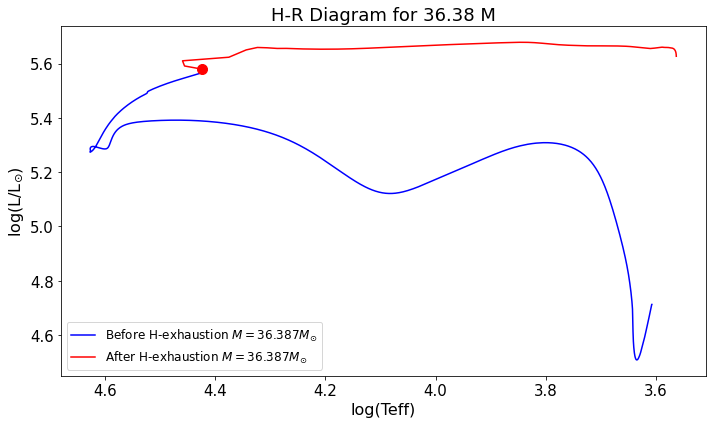

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "history_36_He.data"

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx = i
        columns = line.strip().split()
        break

df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

log_Teff = df['log_Teff'].to_numpy()
log_L = df['log_L'].to_numpy()
center_h1 = df['center_h1'].to_numpy()

h_exhaust_index = np.where(center_h1 < 0.01)[0]
if len(h_exhaust_index) > 0:
    exhaustion_idx = h_exhaust_index[0]
else:
    exhaustion_idx = None

plt.figure(figsize=(10, 6))

if exhaustion_idx is not None:
    plt.plot(log_Teff[:exhaustion_idx + 1], log_L[:exhaustion_idx + 1], color='blue', label='Before H-exhaustion $M = 36.387 M_{\odot}$')
    
    plt.plot(log_Teff[exhaustion_idx:], log_L[exhaustion_idx:], color='red', label='After H-exhaustion $M = 36.387 M_{\odot}$')
    
    plt.plot(log_Teff[exhaustion_idx], log_L[exhaustion_idx], 'ro', markersize=10)
else:
    
    plt.plot(log_Teff, log_L, color='blue', label='Stellar Track')

plt.gca().invert_xaxis()

plt.xlabel('log(Teff)', fontsize=16)
plt.ylabel('log(L/L$_{\odot}$)', fontsize=16)
plt.title('H-R Diagram for 36.38 M', fontsize=18)

plt.tick_params(axis='both', labelsize=14)

plt.legend(fontsize=12)
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig("ex_2_q3_1.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\159717783.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


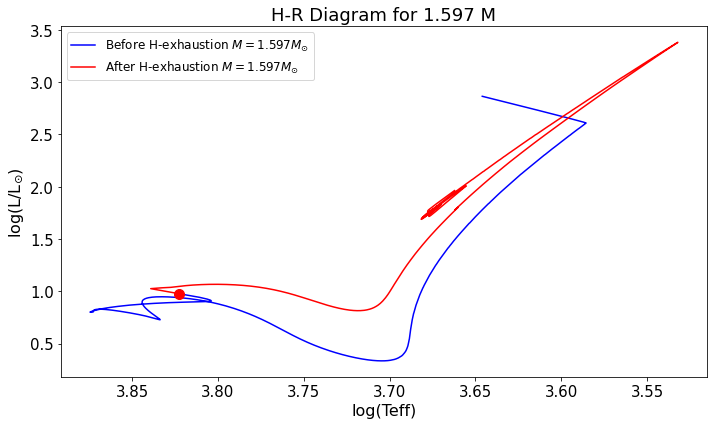

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "history_1_6_Msol_runnight.data"

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx = i
        columns = line.strip().split()
        break

df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

log_Teff = df['log_Teff'].to_numpy()
log_L = df['log_L'].to_numpy()
center_h1 = df['center_h1'].to_numpy()

h_exhaust_index = np.where(center_h1 < 0.01)[0]
if len(h_exhaust_index) > 0:
    exhaustion_idx = h_exhaust_index[0]
else:
    exhaustion_idx = None

plt.figure(figsize=(10, 6))

if exhaustion_idx is not None:
    plt.plot(log_Teff[:exhaustion_idx + 1], log_L[:exhaustion_idx + 1], color='blue', label='Before H-exhaustion $M = 1.597 M_{\odot}$')
    
    plt.plot(log_Teff[exhaustion_idx:], log_L[exhaustion_idx:], color='red', label='After H-exhaustion $M = 1.597 M_{\odot}$')
 
    plt.plot(log_Teff[exhaustion_idx], log_L[exhaustion_idx], 'ro', markersize=10)
else:
    plt.plot(log_Teff, log_L, color='blue', label='Stellar Track')

plt.gca().invert_xaxis()

plt.xlabel('log(Teff)', fontsize=16)
plt.ylabel('log(L/L$_{\odot}$)', fontsize=16)
plt.title('H-R Diagram for 1.597 M', fontsize=18)

plt.tick_params(axis='both', labelsize=14)

plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("ex_2_q3_2.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\3010153897.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\3010153897.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


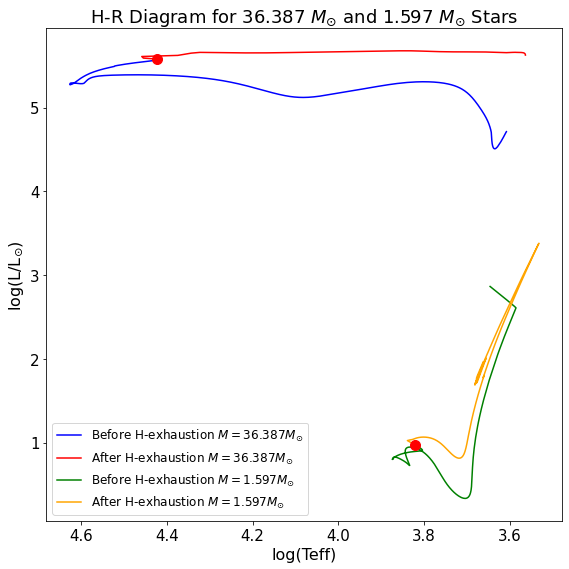

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_hr_data(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if 'star_age' in line and not line.startswith('#'):
            header_idx = i
            columns = line.strip().split()
            break

    df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

    log_Teff = df['log_Teff'].to_numpy()
    log_L = df['log_L'].to_numpy()
    center_h1 = df['center_h1'].to_numpy()

    h_exhaust_index = np.where(center_h1 < 0.01)[0]
    exhaustion_idx = h_exhaust_index[0] if len(h_exhaust_index) > 0 else None

    return log_Teff, log_L, exhaustion_idx

log_Teff_36, log_L_36, exhaust_36 = load_hr_data("history_36_He.data")
log_Teff_16, log_L_16, exhaust_16 = load_hr_data("history_1_6_Msol_runnight.data")

plt.figure(figsize=(8, 8))

plt.plot(log_Teff_36[:exhaust_36+1], log_L_36[:exhaust_36+1], color='blue', label='Before H-exhaustion $M = 36.387 M_{\odot}$')
plt.plot(log_Teff_36[exhaust_36:], log_L_36[exhaust_36:], color='red', label='After H-exhaustion $M = 36.387 M_{\odot}$')
plt.plot(log_Teff_36[exhaust_36], log_L_36[exhaust_36], 'ro', markersize=10)

plt.plot(log_Teff_16[:exhaust_16+1], log_L_16[:exhaust_16+1], color='green', label='Before H-exhaustion $M = 1.597 M_{\odot}$')
plt.plot(log_Teff_16[exhaust_16:], log_L_16[exhaust_16:], color='orange', label='After H-exhaustion $M = 1.597 M_{\odot}$')
plt.plot(log_Teff_16[exhaust_16], log_L_16[exhaust_16], 'ro', markersize=10)

plt.gca().invert_xaxis()
plt.xlabel('log(Teff)', fontsize=16)
plt.ylabel('log(L/L$_{\odot}$)', fontsize=16)
plt.title('H-R Diagram for 36.387 $M_{\odot}$ and 1.597 $M_{\odot}$ Stars', fontsize=18)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("ex_2_q3_3.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18548\3388570400.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


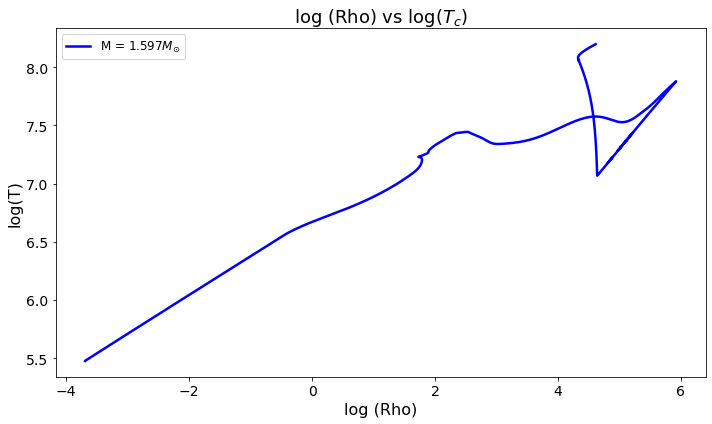

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "history_1_6_Msol_runnight.data"

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx = i
        columns = line.strip().split()
        break

df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

T = df['log_center_T'].to_numpy()
Rho = df['log_cntr_Rho'].to_numpy()

plt.figure(figsize=(10, 6))



plt.plot(Rho, T, color='blue', linewidth = 2.5, label='M = $1.597 M_{\odot}$')

plt.xlabel('log (Rho)', fontsize=16)
plt.ylabel('log(T)', fontsize=16)
plt.title('log (Rho) vs log($T_c$)', fontsize=18)

plt.tick_params(axis='both', labelsize=14)

plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("ex_2_q4_1.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18548\2252625292.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


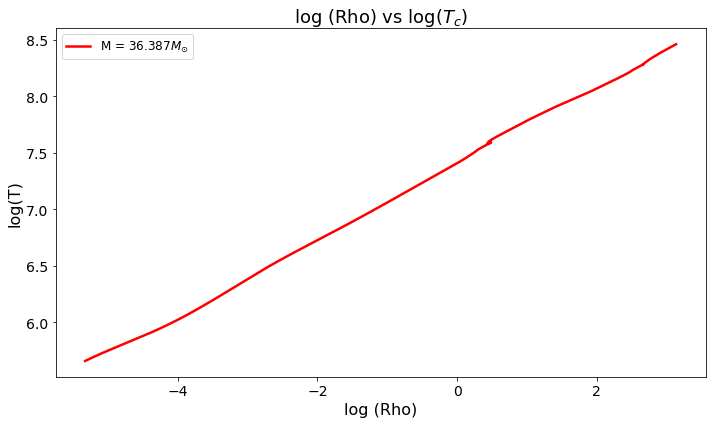

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "history_36_He.data"

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx = i
        columns = line.strip().split()
        break

df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

T = df['log_center_T'].to_numpy()
Rho = df['log_cntr_Rho'].to_numpy()

plt.figure(figsize=(10, 6))



plt.plot(Rho, T, color='red', linewidth = 2.5, label='M = $36.387 M_{\odot}$')

plt.xlabel('log (Rho)', fontsize=16)
plt.ylabel('log(T)', fontsize=16)
plt.title('log (Rho) vs log($T_c$)', fontsize=18)

plt.tick_params(axis='both', labelsize=14)

plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("ex_2_q4_2.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_776\1268786847.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_1 = pd.read_csv(file_path_1, skiprows=header_idx_1 + 1, delim_whitespace=True, names=columns_1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_776\1268786847.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_2 = pd.read_csv(file_path_2, skiprows=header_idx_2 + 1, delim_whitespace=True, names=columns_2)


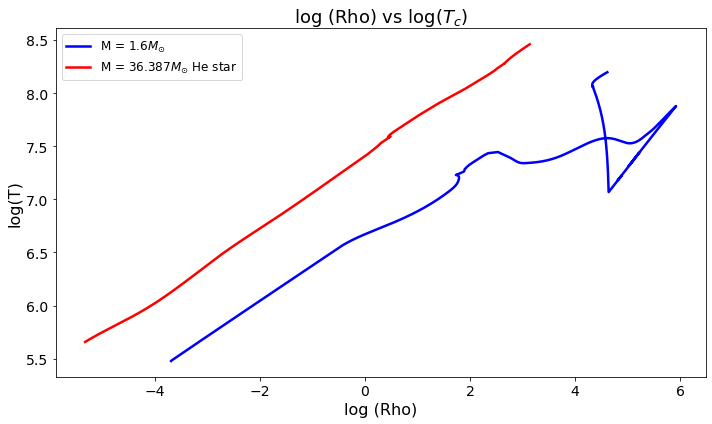

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path_1 = "history_1_6_Msol_runnight.data"

with open(file_path_1, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx_1 = i
        columns_1 = line.strip().split()
        break

df_1 = pd.read_csv(file_path_1, skiprows=header_idx_1 + 1, delim_whitespace=True, names=columns_1)

T_1 = df_1['log_center_T'].to_numpy()
Rho_1 = df_1['log_cntr_Rho'].to_numpy()

file_path_2 = "history_36_He.data"

with open(file_path_2, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx_2 = i
        columns_2 = line.strip().split()
        break

df_2 = pd.read_csv(file_path_2, skiprows=header_idx_2 + 1, delim_whitespace=True, names=columns_2)

T_2 = df_2['log_center_T'].to_numpy()
Rho_2 = df_2['log_cntr_Rho'].to_numpy()

plt.figure(figsize=(10, 6))

plt.plot(Rho_1, T_1, color='blue', linewidth=2.5, label='M = $1.6 M_{\odot}$')

plt.plot(Rho_2, T_2, color='red', linewidth=2.5, label='M = $36.387 M_{\odot}$ He star')

plt.xlabel('log (Rho)', fontsize=16)
plt.ylabel('log(T)', fontsize=16)
plt.title('log (Rho) vs log($T_c$)', fontsize=18)

plt.tick_params(axis='both', labelsize=14)

plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()


plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\856407581.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_1 = pd.read_csv(file_path_1, skiprows=header_idx_1 + 1, delim_whitespace=True, names=columns_1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\856407581.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_2 = pd.read_csv(file_path_2, skiprows=header_idx_2 + 1, delim_whitespace=True, names=columns_2)


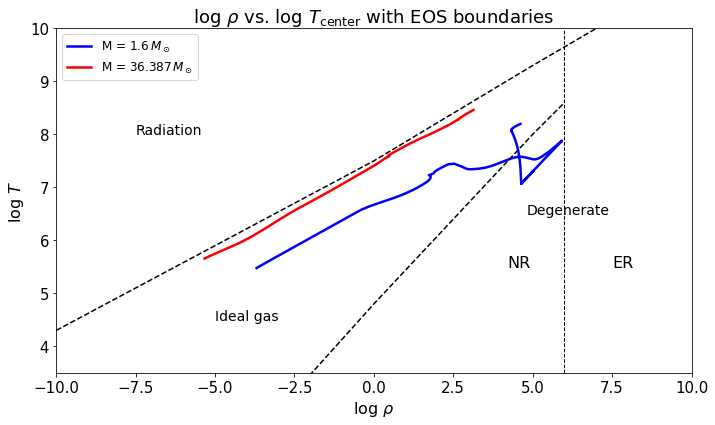

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path_1 = "history_1_6_Msol_runnight.data"
with open(file_path_1, 'r') as f:
    lines = f.readlines()
for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx_1 = i
        columns_1 = line.strip().split()
        break
df_1 = pd.read_csv(file_path_1, skiprows=header_idx_1 + 1, delim_whitespace=True, names=columns_1)
T_1 = df_1['log_center_T'].to_numpy()
Rho_1 = df_1['log_cntr_Rho'].to_numpy()

file_path_2 = "history_36_He.data"
with open(file_path_2, 'r') as f:
    lines = f.readlines()
for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx_2 = i
        columns_2 = line.strip().split()
        break
df_2 = pd.read_csv(file_path_2, skiprows=header_idx_2 + 1, delim_whitespace=True, names=columns_2)
T_2 = df_2['log_center_T'].to_numpy()
Rho_2 = df_2['log_cntr_Rho'].to_numpy()


plt.figure(figsize=(10, 6))


plt.plot(Rho_1, T_1, color='blue', linewidth=2.5, label='M = $1.6\,M_\\odot$')
plt.plot(Rho_2, T_2, color='red', linewidth=2.5, label='M = $36.387\,M_\\odot$')



x1 = [-10, 0, 5, 7]
y1 = [4.3, 7.5, 9.3,10]
plt.plot(x1, y1, 'k--', linewidth=1.5)


x2 = [-2.7, 0, 5,6]
y2 = [3, 4.8, 8.0, 8.6]
plt.plot(x2, y2, 'k--', linewidth=1.5)

plt.axvline(x=6, color='k', linestyle='--', linewidth=1)

plt.text(-7.5, 8, 'Radiation', fontsize=14)
plt.text(-5, 4.5, 'Ideal gas', fontsize=14)
plt.text(4.8, 6.5, 'Degenerate', fontsize=14)
plt.text(4.2, 5.5, 'NR', fontsize=16)
plt.text(7.5, 5.5, 'ER', fontsize=16)

plt.xlabel(r'$\log\,\rho$', fontsize=16)
plt.ylabel(r'$\log\,T$', fontsize=16)
plt.title(r'$\log\,\rho$ vs. $\log\,T_{\rm center}$ with EOS boundaries', fontsize=18)
plt.xlim(-10, 10)
plt.ylim(3.5, 10)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("ex_2_q4_3.jpg", dpi = 1200)
plt.show()


In [ ]:
import numpy as np

x2 = np.array([-2.7, 0, 5,6])
y2 = np.array([3, 4.8, 8.0, 8.6])

slope, intercept = np.polyfit(x1, y1, 1)

print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")


Slope: 0.335
Intercept: 7.608


In [ ]:
import numpy as np

x2 = np.array([-2.7, 0, 5, 6])
y2 = np.array([3, 4.8, 8.0, 8.6])

slope2, intercept2 = np.polyfit(x2, y2, 1)

# Display the results
print(f"Slope: {slope2:.3f}")
print(f"Intercept: {intercept2:.3f}")


Slope: 0.644
Intercept: 4.764
